In [8]:
import math
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("iris.csv", header=None)
np.random.seed(0)
#store results of iterations in dict
test_res = defaultdict(list)
train_res = defaultdict(list)
test_no_norm = defaultdict(list)

for iteration in range(20):
    #shuffle data
    ds = df.sample(frac=1)

    #split data into 80% train, 20% test
    train, test = train_test_split(ds,test_size=0.2)
    train_att = train[[0,1,2,3]]
    test_att = test[[0,1,2,3]]

    #normalize data
    train_norm = (train_att - train_att.min()) / (train_att.max() - train_att.min())
    test_norm = (test_att - train_att.min()) / (train_att.max() - train_att.min())
    train_norm.fillna(0, inplace=True)
    test_norm.fillna(0, inplace=True)

    '''
    k - number of neighbors
    data - dataset
    instance - instance to classify
    '''
    def knn(k,data,instance):
        distances = data.apply(lambda row: math.dist(row,instance), axis=1)
        #get k closest instances (including the input instance)
        k_neighbors = distances.sort_values()[:k]
        #get class value with largest number of occurences
        predicted_class = df.loc[k_neighbors.index,[4]][4].mode()
        return predicted_class[0]

    '''
    train knn using training data
    return the accuracy of the model
    examples - specify training set
    '''
    def train_knn(k,data,examples):
        predictions = data.apply(lambda row: knn(k,examples,row), axis=1)
        actual_labels = df.loc[predictions.index,[4]]
        return predictions.eq(actual_labels[4].values).mean()

    for i in range(1,51,2):
        train_res[i].append(train_knn(i,train_norm,train_norm))
        test_res[i].append(train_knn(i,test_norm,train_norm))
        test_no_norm[i].append(train_knn(i,test_att,train_att))

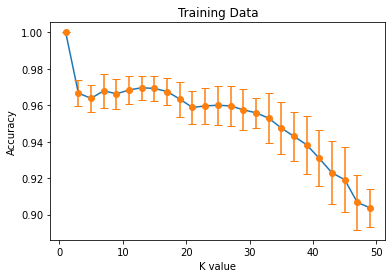

In [21]:
train_iter = []
train_acc = []
train_std = []

for k_val,res in train_res.items():
    train_iter.append(k_val)
    train_acc.append(np.average(res))
    train_std.append(np.std(res))

plt.plot(train_iter,train_acc)
plt.errorbar(train_iter,train_acc,yerr = train_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Training Data")
plt.show()

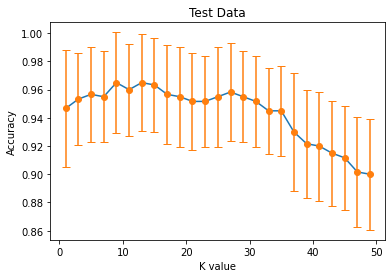

In [22]:
test_iter = []
test_acc = []
test_std = []

for k_val,res in test_res.items():
    test_iter.append(k_val)
    test_acc.append(np.average(res))
    test_std.append(np.std(res))


plt.plot(test_iter,test_acc)
plt.errorbar(test_iter,test_acc,yerr = test_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Test Data")
plt.show()

**Q1.3 (8 Points)** Explain intuitively why each of these curves look the way they do. First,
analyze the graph showing performance on the training set as a function of k. Why do you think
the graph looks like that? Next, analyze the graph showing performance on the testing set as a
function of k. Why do you think the graph looks like that?

>For the graph showing performance on the training set, for K = 1 the accuracy is 1.00 due to the fact that we do not ignore the instance being tested in our KNN algorithm. This means that the algorithm will always group instances from the training sets with themselves. The std deviation for each point generally increases for increased values of K. This makes sense because as larger groups are formed, it is likelier that data points are incorrectly labeled.
For the graph showing performance on the testing set, the accuracy maxes out at around 0.96 for K = 9. There is a general decrease in accuracy as K increases but for low values of K there is slight growth. The std deviation for each point is roughly the same and is significantly larger than in the training set. This is likely due to the fact that both the training and testing sets are normalized according to the training set, and that the testing set is significantly smaller than the training set.

**Q1.4 (6 Points)** We say that a model is underfitting when it performs poorly on the training
data (and most likely on the testing data as well). We say that a model is overfitting when it
performs well on training data but it does not generalize to new instances. Identify and report
the ranges of values of k for which k-NN is underfitting, and ranges of values of k for which
k-NN is overfitting.

>For K values from 1-15 the model is overfitting. For K values from 15-51, the model is still overfitting, but it becomes increasingly underfitting.

**Q1.5 (6 Points)** Based on the analyses made in the previous question, which value of k you
would select if you were trying to fine-tune this algorithm so that it worked as well as possible in
real life? Justify your answer.

>I would select a K value of about 15, as this is when the model starts to switch from overfitting to underfitting. In both the training and testing data, the accuracy is around 0.96 at K = 15, meaning the estimates for both sets are similarly accurate (although the testing data shows a significantly greater std deviation).

**Q1.6 (10 Points)** In the experiments conducted earlier, you normalized the features before
running k-NN. This is the appropriate procedure to ensure that all features are considered
equally important when computing distances. Now, you will study the impact of omitting feature
normalization on the performance of the algorithm. To accomplish this, you will repeat Q1.2
and create a graph depicting the average accuracy (and corresponding standard deviation) of
k-NN as a function of k, when evaluated on the testing set. However, this time you will run the
algorithm without first normalizing the features. This means that you will run k-NN directly on
the instances present in the original dataset without performing any pre-processing normalization
steps to ensure that all features lie in the same range/interval. Now (a) present the graph you
created;

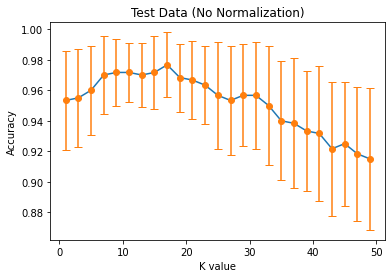

In [23]:
test_iter_raw = []
test_acc_raw = []
test_std_raw = []

for k_val,res in test_no_norm.items():
    test_iter_raw.append(k_val)
    test_acc_raw.append(np.average(res))
    test_std_raw.append(np.std(res))


plt.plot(test_iter_raw,test_acc_raw)
plt.errorbar(test_iter_raw,test_acc_raw,yerr = test_std_raw,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Test Data (No Normalization)")
plt.show()

(b) based on this graph, identify the best value of k; that is, the value of k that results
in k-NN performing the best on the testing set; 

>Based on this graph, I would choose a value of K closer to 20, either 17 or 19. This is because the accuracy is higher around these points and the std deviation is lower when compared to the normalized graphs.

and (c) describe how the performance of this
version of k-NN (without feature normalization) compares with the performance of k-NN with
feature normalization. Discuss intuitively the reasons why one may have performed better than
the other.

>This version of KNN seems to perform better than the version with normalization. The accuracy of the non-normalized KNN is slightly higher and the std deviation is lower in the K = 15-20 range. The reasons for this improved accuracy and deviation may be due to the fact that normalizing the test data on the training data could cause the model to overfit to the training data.